1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

from resource import *

In [2]:
X_train, y_train, coef = make_regression(n_samples=1000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=25,
                                         coef=True,
                                         random_state=42)
# data_train = pd.DataFrame({'X': X_train[:, 0], 'Y': y_train})
data_train = pd.DataFrame({'X1': X_train[:, 0], 'X2': X_train[:, 1], 'Y': y_train})
X = data_train.drop('Y', axis=1)
Y = data_train['Y']

In [3]:
coef

array([40.71064891,  6.60098441])

In [4]:
np.linalg.inv(X.T @ X) @ X.T @ Y

0    41.608344
1     7.097666
dtype: float64

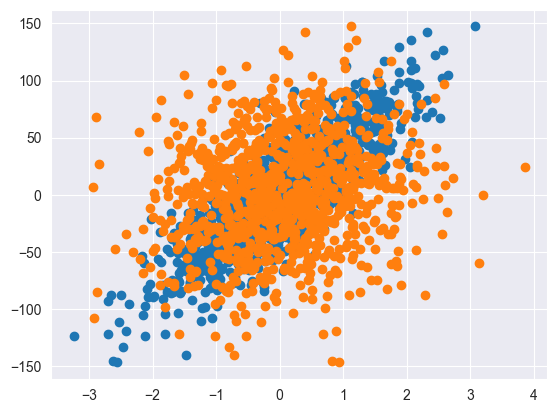

In [5]:
# посмотрим, что получилось

plt.plot(X_train, y_train, 'o')
plt.show()

In [6]:
from sklearn.linear_model import SGDRegressor

skl_regressor = SGDRegressor(max_iter=int(1e6), tol=1e-5, eta0=1e-3)
skl_l = skl_regressor.fit(X, Y)
skl_predictions = skl_regressor.predict(X)

print(skl_regressor.coef_, skl_regressor.intercept_)

[41.59647952  7.09487939] [0.04427436]


## Pseudocode
[Математические методы распознавания образов (курс лекций, В.В.Китов)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29)

```{python}
1. function gd(X, alpha, epsilon):
2. initialise beta
3. do:
4.  Beta = new_beta
5.  new_Beta = Beta - alpha*grad(X, beta)
6. until dist(new_beta, beta) < epsilon
7. return beta
```

## Stochastic gradient descent

```{python}
1. function sgd(X, alpha, epsilon):
2. initialise beta
3. do:
4.  X = shuffle(X)
5.  for x in X:
6.      Beta = new_beta
7.      new_Beta = Beta - alpha*grad(x, beta)
8. until dist(new_beta, beta) < epsilon
9. return beta
```

In [7]:
regressor = MyGradientLinearRegression(samples=X, targets=Y, alpha=1e-3, diff_mse=1e-5, print_cost=True)

l = regressor.fit()

# predictions = regressor.predict()
w = regressor.get_weights()
w

Cost at iteration 100 is 1687.34070941454, weight=[7.79887854 2.14676628 1.10441077]
Cost at iteration 200 is 1351.7237648856071, weight=[13.50991193  3.08415543  1.14261745]
Cost at iteration 300 is 1120.3718221545817, weight=[18.25494192  3.84223123  1.13386208]
Cost at iteration 400 is 960.837635244128, weight=[22.19760136  4.45557597  1.0936266 ]
Cost at iteration 500 is 850.7905099612778, weight=[25.47376091  4.95205831  1.03336611]
Cost at iteration 600 is 774.8556447659914, weight=[28.19624744  5.35414343  0.96145394]
Cost at iteration 700 is 722.443146008736, weight=[30.458759    5.67994636  0.88391713]
Cost at iteration 800 is 686.2560764833298, weight=[32.33911344  5.94407925  0.80500739]
Cost at iteration 900 is 661.2646564524945, weight=[33.90194421  6.15833282  0.72764269]
Cost at iteration 1000 is 644.0006441423611, weight=[35.20093778  6.33222466  0.65374774]
Cost at iteration 1100 is 632.0717443509789, weight=[36.28069064  6.4734404   0.58451524]
Cost at iteration 1200 

array([41.55392922,  7.09084852,  0.05130972])

In [8]:
class MySGDLinearRegression(MyGradientLinearRegression):

    def _calc_gradient(self):
        n, k = self.samples.shape
        ind = np.random.randint(n)

        pred = self.samples[ind].reshape(-1, k) @ self.weight
        grad = 2 * (pred - self.targets[ind]) @ self.samples[ind].reshape(-1, k)

        return grad

In [9]:
sgd_regressor = MySGDLinearRegression(samples=X, targets=Y, alpha=1e-3, diff_mse=1e-5, print_cost=True)

sgd_l = sgd_regressor.fit()

# sgd_predictions = sgd_regressor.predict()
sgd_w = sgd_regressor.get_weights()
sgd_w

Cost at iteration 100 is 1731.026195294119, weight=[7.12453802 2.05770303 2.02980773]
Cost at iteration 200 is 1419.6948366346971, weight=[12.33065275  2.48194209  1.40380051]
Cost at iteration 300 is 1239.7025719176672, weight=[15.61462166  3.99918411  1.09315429]
Cost at iteration 400 is 1099.6528894519847, weight=[18.63334845  4.59520198  0.73375494]
Cost at iteration 500 is 936.0458428248097, weight=[22.83695685  5.23148386 -0.45765676]
Cost at iteration 600 is 834.8407440001562, weight=[25.90122797  6.43594183 -0.46895857]
Cost at iteration 700 is 764.4301909441098, weight=[28.51240894  6.37927759  0.16595845]
Cost at iteration 800 is 746.5532418759813, weight=[29.45861031  5.09073363 -0.23376594]
Cost at iteration 900 is 712.9231324522509, weight=[31.2245765   4.5443265  -0.55566657]
Cost at iteration 1000 is 682.6316954723545, weight=[32.82209972  5.14055815 -0.96593357]
Cost at iteration 1100 is 664.1548693714011, weight=[34.14206069  5.11977727 -1.40260619]
Cost at iteration 1

array([41.87144787,  7.24440861,  0.19576967])

In [10]:
class MySGDBatchLinearRegression(MyGradientLinearRegression):

    def __init__(self, batch_size=32, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_size = batch_size

    def _calc_gradient(self):
        n, k = self.samples.shape

        # Выбор случайных индексов
        indices = np.random.choice(np.arange(n), size=self.batch_size, replace=False)

        # Вычисление предсказаний и градиента
        pred = self.samples[indices] @ self.weight
        grad = 2 * (pred - self.targets[indices]) @ self.samples[indices] / self.batch_size

        return grad


In [11]:
sgd_bach_regressor = MySGDBatchLinearRegression(samples=X, targets=Y,
                                                alpha=1e-3, diff_mse=1e-5,
                                                batch_size=64,
                                                print_cost=True)

sgd_bach_l = sgd_bach_regressor.fit()

sgd_bach_w = sgd_bach_regressor.get_weights()
sgd_bach_w  # ideal [41.59177174  7.09518436] [0.04149802]

Cost at iteration 100 is 1676.6476357867134, weight=[7.97006623 2.15718889 0.99054989]
Cost at iteration 200 is 1344.7106037644005, weight=[13.63963265  3.1188586   1.15989848]
Cost at iteration 300 is 1111.6374165641112, weight=[18.43283988  4.01717279  1.28819538]
Cost at iteration 400 is 956.5259896392229, weight=[22.31038292  4.52825614  1.25763721]
Cost at iteration 500 is 849.071713240077, weight=[25.52414137  5.05444837  1.27541138]
Cost at iteration 600 is 773.2957885973715, weight=[28.26851427  5.34859781  1.17220959]
Cost at iteration 700 is 721.981110966498, weight=[30.47519768  5.75616002  0.98700526]
Cost at iteration 800 is 686.3526109194777, weight=[32.3398741   5.95588021  0.9521431 ]
Cost at iteration 900 is 662.5269962963143, weight=[33.81825615  6.15202514  0.79372159]
Cost at iteration 1000 is 644.7104672889402, weight=[35.1296695   6.45791359  0.70903909]
Cost at iteration 1100 is 631.75955027402, weight=[36.30435451  6.54467348  0.59162719]
Cost at iteration 1200 

array([40.63639795,  6.88776224,  0.40434959])

In [12]:
class MyMiniBatchLinearRegression(MyGradientLinearRegression):
    def __init__(self, batch_size=32, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_size = batch_size

    def _calc_gradient(self):
        n, k = self.samples.shape
        n_batches = n // self.batch_size
        if n % self.batch_size != 0:
            n_batches += 1

        gradient = np.zeros(k)

        for b in range(n_batches):
            start = b * self.batch_size
            end = (b + 1) * self.batch_size
            X_batch = self.samples[start:end]
            y_batch = self.targets[start:end]

            # Compute gradient for the batch
            pred = X_batch @ self.weight
            grad = 2 * (pred - y_batch) @ X_batch
            gradient += grad

        return gradient / n_batches


In [13]:
mini_bach_regressor = MyMiniBatchLinearRegression(samples=X, targets=Y,
                                                alpha=1e-3, diff_mse=1e-5,
                                                batch_size=32,
                                                print_cost=True)

mini_bach_l = mini_bach_regressor.fit()

mini_bach_w = mini_bach_regressor.get_weights()
mini_bach_w

Cost at iteration 100 is 605.3524904376626, weight=[41.49228273  7.08532127  0.06391082]
Model alpha: 0.001, diff_mse: 1e-05, iterations: 143 ...


array([4.15984087e+01, 7.09476500e+00, 4.15082584e-02])

2. [*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).